In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def add_intercept(X):
    intercept = np.zeros((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

def logreg_fit(X, y, lr, num_iter):

    theta = np.zeros(X.shape[1])

    for i in range(num_iter):
        z = np.dot(X, theta)
        ypred = sigmoid(z)
        gradient = np.dot(X.T, (ypred - y))/y.size
        theta = theta - lr * gradient

        z = np.dot(X, theta)
        ypred = sigmoid(z)
        calc_loss = loss(ypred, y)
    
    return theta

def predict_logreg(X, theta):
    prob = sigmoid(np.dot(X, theta))
    prob[prob >= 0.6] = 1
    prob[prob < 0.6] = 0
    return prob

Logistic Regression Accuracy for threshold 0.5 is: 92.92035398230088
Logistic Regression Accuracy for threshold 0.55 is: 90.2654867256637
Logistic Regression Accuracy for threshold 0.6 is: 83.1858407079646
Logistic Regression Accuracy for threshold 0.65 is: 70.79646017699115
Logistic Regression Accuracy for threshold 0.7 is: 70.79646017699115


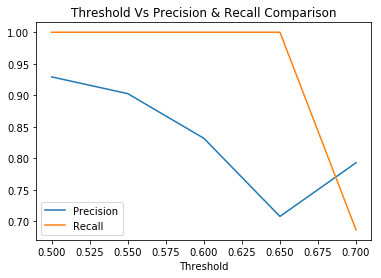

KNN accuracy is: 81.41592920353983


In [11]:
if __name__ == '__main__':

    THRESHOLD = [0.5, 0.55, 0.6, 0.65, 0.7]
    precision = []
    recall= []

    for thresh in THRESHOLD:
        data = pd.read_csv('../Dataset/AdmissionDataset/data.csv', skiprows=1, delimiter=',', header=None)
        data = data.drop(labels=[0], axis=1)

        data[8].values[data[8].values >= thresh] = 1
        data[8].values[data[8].values < thresh] = 0

        data = data.values

        X = data[:, :-1]
        X = preprocessing.normalize(X)
        X = add_intercept(X)
        y = data[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

        theta = logreg_fit(X, y, lr=0.1, num_iter=10000)
        preds = predict_logreg(X_test, theta)
        acc = len([1 for yhat, ytrue in zip(preds, y_test) if yhat == ytrue])/len(y_test)
        print("Logistic Regression Accuracy for threshold", thresh, "is:", acc*100)
        precision.append(precision_score(y_test, preds))
        recall.append(recall_score(y_test, preds))
    
    plt.plot(THRESHOLD, precision, label='Precision')
    plt.plot(THRESHOLD, recall, label='Recall')
    plt.xlabel('Threshold')
    plt.title('Threshold Vs Precision & Recall Comparison')
    plt.legend()
    plt.show()

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    acc_knn = neigh.score(X_test, y_test)
    print("KNN accuracy is:", acc_knn*100)